# Python Code Implementation for TSP

In [71]:
import random

class AntColony:
    def __init__(self, ants, nodes, alpha=1.0, beta=2.0, rho=0.1, tau_0=1.0):
        self.ants = ants
        self.nodes = nodes
        self.alpha = alpha  # influence of pheromone
        self.beta = beta    # influence of heuristic
        self.rho = rho      # pheromone evaporation rate
        self.tau_0 = tau_0  # initial pheromone level
        
        # Initialize pheromone matrix (nodes x nodes) with tau_0
        self.pheromone = [[tau_0 for _ in range(nodes)] for _ in range(nodes)]
        
        # Distance matrix (assumed to be given or pre-calculated)
        self.distances = [[random.randint(1, 10) for _ in range(nodes)] for _ in range(nodes)]
        
    def node_transition(self, current_node, allowed_nodes):
        """
        Select the next node based on pheromone and heuristic values.
        Uses the probability distribution based on pheromone and distance.
        """
        probabilities = []
        total_prob = 0.0
        
        for j in allowed_nodes:
            tau = self.pheromone[current_node][j]
            eta = 1.0 / self.distances[current_node][j]  # Inverse of the distance
            prob = (tau ** self.alpha) * (eta ** self.beta)
            probabilities.append(prob)
            total_prob += prob
        
        probabilities = [prob / total_prob for prob in probabilities]
        
        next_node = random.choices(allowed_nodes, probabilities)[0]
        return next_node

    def global_pheromone_update(self, best_tour, L_best):
        """
        Update the pheromone matrix globally based on the best tour found.
        Only the best tour gets reinforced.
        """
        for i in range(len(best_tour) - 1):
            node1 = best_tour[i]
            node2 = best_tour[i + 1]
            # Update pheromone on edge (node1, node2)
            self.pheromone[node1][node2] += 1.0 / L_best
            self.pheromone[node2][node1] += 1.0 / L_best  # Since it's symmetric
        return self.pheromone

    def local_pheromone_update(self, current_edge):
        """
        Update pheromone locally during the construction of the solution.
        """
        node1, node2 = current_edge
        self.pheromone[node1][node2] = (1 - self.alpha) * self.pheromone[node1][node2] + self.alpha * self.tau_0
        self.pheromone[node2][node1] = (1 - self.alpha) * self.pheromone[node2][node1] + self.alpha * self.tau_0
        
    def evaluate_solution(self, tour):
        """
        Evaluate the solution based on the total distance of the tour.
        """
        total_distance = 0
        for i in range(len(tour) - 1):
            total_distance += self.distances[tour[i]][tour[i + 1]]
        total_distance += self.distances[tour[-1]][tour[0]]  # Closing the tour
        return total_distance

    def run(self, max_generations):
        """
        Run the Ant Colony Optimization for a given number of generations.
        """
        best_tour = None
        best_distance = float('inf')
        
        for generation in range(max_generations):
            all_tours = []
            all_distances = []
            
            for _ in range(self.ants):
                tour = self.construct_tour()
                distance = self.evaluate_solution(tour)
                all_tours.append(tour)
                all_distances.append(distance)
                
                # Update the best tour found
                if distance < best_distance:
                    best_distance = distance
                    best_tour = tour
                    
            # Global pheromone update on the best tour found
            self.global_pheromone_update(best_tour, best_distance)
        
        return best_tour, best_distance
    
    def construct_tour(self):
        """
        Each ant constructs a solution by selecting the next node based on pheromone and distance.
        """
        tour = []
        allowed_nodes = list(range(self.nodes))
        current_node = random.choice(allowed_nodes)
        tour.append(current_node)
        allowed_nodes.remove(current_node)
        
        # Construct the tour by moving to the next allowed node
        while allowed_nodes:
            next_node = self.node_transition(current_node, allowed_nodes)
            tour.append(next_node)
            allowed_nodes.remove(next_node)
            self.local_pheromone_update((current_node, next_node))
            current_node = next_node
        
        return tour

# Number of nodes (cities)
nodes = 5

# Create a random distance matrix for the example
# The distance matrix is symmetric (distance from city i to city j is the same as from j to i)
distances = [[random.randint(10, 100) if i != j else 0 for i in range(nodes)] for j in range(nodes)]

# Parameters for Ant Colony Optimization
ants = 10  # Number of ants
alpha = 1.0  # Influence of pheromone
beta = 2.0   # Influence of distance (heuristic)
rho = 0.1    # Pheromone evaporation rate
tau_0 = 1.0  # Initial pheromone level

# Initialize the Ant Colony with the given parameters
ant_colony = AntColony(ants, nodes, alpha=alpha, beta=beta, rho=rho, tau_0=tau_0)
ant_colony.distances = distances  # Set the distance matrix

# Run the ACO for a specified number of generations
max_generations = 100
best_tour, best_distance = ant_colony.run(max_generations)

# Print the best solution found
print("Best tour found:", best_tour)
print("Best distance found:", best_distance)


Best tour found: [4, 2, 0, 1, 3]
Best distance found: 138


# Python Code Implementation for RCPSP

Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
Scheduling task 0
Scheduling task 1
Scheduling task 3
Scheduling task 4
No eligible tasks — possible deadlock!
S

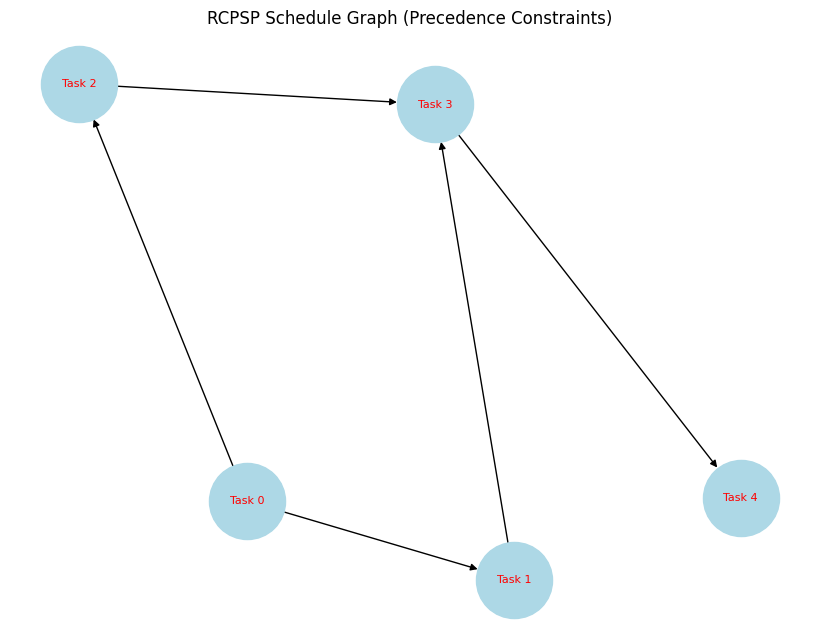

In [58]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class AntColonyRCPSP:
    def __init__(self, ants, tasks, durations, resources, precedence_constraints, alpha=1.0, beta=2.0, rho=0.1, tau_0=1.0):
        self.ants = ants
        self.tasks = tasks
        self.durations = durations  # Duration of each task
        self.resources = resources  # Resource capacities per time unit
        self.precedence_constraints = precedence_constraints  # Task precedence constraints
        self.alpha = alpha  # Influence of pheromone
        self.beta = beta    # Influence of heuristic (task duration, etc.)
        self.rho = rho      # Pheromone evaporation rate
        self.tau_0 = tau_0  # Initial pheromone level
        
        # Initialize pheromone matrix (tasks x tasks) with tau_0
        self.pheromone = [[tau_0 for _ in range(tasks)] for _ in range(tasks)]
        # Initialize the time slots for scheduling
        self.time_slots = []

    def get_eligible_tasks(self, scheduled_tasks, available_tasks):
        """
        Get tasks that are eligible for scheduling based on precedence constraints.
        A task can be scheduled only if all its predecessors are already scheduled.
        Additionally, after Task 0, only Task 1 or Task 2 should be selected, but not both.
        If Task 1 is selected, Task 2 should be removed and vice versa.
        After Task 1 or Task 2, Task 3 should be selected next.
        """
        eligible = []
        for task in available_tasks:
            # Get all tasks that must be scheduled before this one
            predecessors = [pre for pre, succs in self.precedence_constraints.items() if task in succs]
            
            # Task is eligible if all its predecessors are scheduled
            if all(pre in scheduled_tasks for pre in predecessors):
                eligible.append(task)
        
        # After Task 0, ensure only one of Task 1 or Task 2 is selected
        if 0 in scheduled_tasks:
            if 1 in eligible and 2 in eligible:
                eligible.remove(2)  # If Task 1 is eligible, remove Task 2 and vice versa

            # Once Task 1 or Task 2 is scheduled, exclude the other task
            if 1 in scheduled_tasks:
                if 2 in eligible:
                    eligible.remove(2)  # Task 2 should be excluded if Task 1 is scheduled
            elif 2 in scheduled_tasks:
                if 1 in eligible:
                    eligible.remove(1)  # Task 1 should be excluded if Task 2 is scheduled

        # After Task 1 or Task 2, Task 3 should be selected next
        if 1 in scheduled_tasks or 2 in scheduled_tasks:
            if 3 not in eligible and 3 not in scheduled_tasks:
                eligible.append(3)

        # After Task 3, Task 4 should be selected next
        if 3 in scheduled_tasks:
            if 4 not in eligible and 4 not in scheduled_tasks:
                eligible.append(4)
        
        return eligible

    def state_transition(self, available_tasks, current_time):
        """
        Select the next task to schedule based on pheromone and heuristic.
        """
        probabilities = []
        total_prob = 0.0
        
        for task in available_tasks:
            if self.check_resource_constraints(task, current_time):
                # Calculate the probability of choosing this task based on pheromone and duration
                pheromone = self.pheromone[task][task]  # Using pheromone for the current task
                heuristic = 1 / self.durations[task]  # Heuristic: inverse of task duration
                prob = (pheromone ** self.alpha) * (heuristic ** self.beta)
                probabilities.append(prob)
                total_prob += prob
        
        # Normalize probabilities
        probabilities = [prob / total_prob for prob in probabilities]
        # Select the next task based on the probabilities
        next_task = random.choices(available_tasks, probabilities)[0]
        return next_task

    def check_resource_constraints(self, task, current_time):
        """
        Check if scheduling the task at the current time would violate the resource constraints.
        """
        task_start_time = current_time
        task_end_time = task_start_time + self.durations[task]
        
        # Check resource availability for the task's time window
        for time in range(task_start_time, task_end_time):
            if time >= len(self.time_slots):
                self.time_slots.append([0] * len(self.resources))  # Extend time slots if needed
            # Check if there are enough resources available at this time slot
            required_resources = self.get_task_resources(task)
            for i, capacity in enumerate(self.resources):
                if self.time_slots[time][i] + required_resources[i] > capacity:
                    return False  # Resource constraint violated
        return True

    def get_task_resources(self, task):
        """
        Get the resource requirements for the task.
        (This would be defined for each task individually)
        """
        # Here, we simulate a random resource requirement for each task
        return [random.randint(1, 5) for _ in self.resources]  # Random resource requirement for each task

    def local_pheromone_update(self, task_sequence):
        """
        Apply local pheromone update while constructing a schedule.
        """
        for i in range(len(task_sequence) - 1):
            task1 = task_sequence[i]
            task2 = task_sequence[i + 1]
            self.pheromone[task1][task2] = (1 - self.alpha) * self.pheromone[task1][task2] + self.alpha * self.tau_0
            self.pheromone[task2][task1] = (1 - self.alpha) * self.pheromone[task2][task1] + self.alpha * self.tau_0
    
    def global_pheromone_update(self, best_sequence, best_makespan):
        """
        Global pheromone update after all ants have completed their schedules.
        """
        for i in range(len(best_sequence) - 1):
            task1 = best_sequence[i]
            task2 = best_sequence[i + 1]
            self.pheromone[task1][task2] += 1.0 / best_makespan
            self.pheromone[task2][task1] += 1.0 / best_makespan
    
    def evaluate_schedule(self, task_sequence):
        """
        Evaluate the makespan of the schedule.
        """
        makespan = 0
        for i in range(len(task_sequence) - 1):
            task1 = task_sequence[i]
            task2 = task_sequence[i + 1]
            task_start_time = max(makespan, self.time_slots[task1][-1])
            makespan = task_start_time + self.durations[task2]
        return makespan
    
    def run(self, max_generations):
        """
        Run the Ant Colony Optimization algorithm for RCPSP.
        """
        best_schedule = None
        best_makespan = float('inf')
        
        for generation in range(max_generations):
            all_schedules = []
            all_makespans = []
            
            # Each ant constructs a schedule
            for _ in range(self.ants):
                schedule = self.construct_schedule()
                makespan = self.evaluate_schedule(schedule)
                all_schedules.append(schedule)
                all_makespans.append(makespan)
                if makespan < best_makespan:
                    best_makespan = makespan
                    best_schedule = schedule
                    
            # Update pheromone based on the best schedule
            self.global_pheromone_update(best_schedule, best_makespan)
        
        return best_schedule, best_makespan
    
    def construct_schedule(self):
        """
        Each ant constructs a schedule based on available tasks, considering resource constraints.
        """
        schedule = []
        available_tasks = list(range(self.tasks))  # All tasks initially available
        current_time = 0

        while available_tasks:
            # 🔒 Filter based on precedence and ensure Task 1 and Task 2 are mutually exclusive
            eligible_tasks = self.get_eligible_tasks(schedule, available_tasks)

            if not eligible_tasks:
                print("No eligible tasks — possible deadlock!")
                break

            next_task = self.state_transition(eligible_tasks, current_time)
            print(f"Scheduling task {next_task}")
            schedule.append(next_task)
            self.local_pheromone_update(schedule)
            available_tasks.remove(next_task)  # Remove the selected task from available tasks
            current_time += self.durations[next_task]

        return schedule
    
    def draw_graph(self):
        """
        Visualize the RCPSP as a directed graph using NetworkX.
        """
        # Create a directed graph using NetworkX
        G = nx.DiGraph()

        # Add nodes and edges based on precedence constraints
        for task, successors in self.precedence_constraints.items():
            G.add_node(task, duration=self.durations[task])  # Add node with duration as attribute
            for succ in successors:
                G.add_edge(task, succ)  # Add directed edges based on precedence

        # Set node labels as task IDs and add duration as node attributes
        node_labels = {i: f"Task {i}" for i in range(self.tasks)}
        task_durations = {i: f"Dur: {self.durations[i]}" for i in range(self.tasks)}

        pos = nx.spring_layout(G, seed=42)  # Node positions using spring layout

        for task in range(self.tasks):
            if task not in pos:
                pos[task] = (random.random(), random.random())  # Add missing positions for nodes

        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=False, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

        # Display durations on the nodes
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color="red")

        plt.title("RCPSP Schedule Graph (Precedence Constraints)")
        plt.show()

# Example usage
tasks = 5
durations = [3, 9, 4, 5, 10]  # Duration of each task
resource_capacity = [15, 15]  # 2 types of resources with capacity 15 each
precedence_constraints = {
    0: [1, 2],  # Task 0 precedes task 1 and task 2
    1: [3],     # Task 1 precedes task 3
    2: [3],     # Task 2 precedes task 3
    3: [4],     # Task 3 precedes task 4
    4: [],      # Task 4 has no successors
}

# Initialize the RCPSP Ant Colony
ant_colony_rcpsp = AntColonyRCPSP(ants=20, tasks=tasks, durations=durations,
                                 resources=resource_capacity, precedence_constraints=precedence_constraints)

# Run the Ant Colony Optimization for RCPSP
best_schedule, best_makespan = ant_colony_rcpsp.run(max_generations=200)

# Print the best schedule and makespan
print("Best Schedule:", best_schedule)
print("Best Makespan:", best_makespan)

# Draw the graph for RCPSP
ant_colony_rcpsp.draw_graph()